# Project: "We Rate Dogs" Twitter Data Wrangling

## Analysis and Visualization

This section of the project focuses on coming up with visuals and insights about the data that was wrangled and cleaned in the previous section. 

In [17]:
#Import requried packages
import pandas as pd

In [18]:
#Reload the clean dataframe
df = pd.read_csv('twitter_archive_master.csv')

In [19]:
df.head()

,Unnamed: 0,tweet_id,likes,retweet_count,predicted_breed,timestamp,text,new_names,final_float_ratings,classification
0,2,890006608113172480,30808.0,7447.0,Samoyed,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,koda,1.3,not provided
1,3,872620804844003328,20998.0,3804.0,cocker_spaniel,2017-06-08 01:06:27,This is Monkey. She's supporting owners everyw...,monkey,1.3,not provided
2,4,872486979161796608,41017.0,9220.0,Pembroke,2017-06-07 16:14:40,We. Only. Rate. Dogs. Do not send in other thi...,Invalid Name,1.2,not provided
3,14,870804317367881728,34089.0,6417.0,home_theater,2017-06-03 00:48:22,Real funny guys. Sending in a pic without a do...,Invalid Name,1.1,not provided
4,17,870374049280663552,83813.0,27060.0,golden_retriever,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,zoey,1.3,not provided


In [20]:
#Remove the first column that was imported 
df.drop(['Unnamed: 0'], axis =1, inplace = True)

In [21]:
df.head()

,tweet_id,likes,retweet_count,predicted_breed,timestamp,text,new_names,final_float_ratings,classification
0,890006608113172480,30808.0,7447.0,Samoyed,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,koda,1.3,not provided
1,872620804844003328,20998.0,3804.0,cocker_spaniel,2017-06-08 01:06:27,This is Monkey. She's supporting owners everyw...,monkey,1.3,not provided
2,872486979161796608,41017.0,9220.0,Pembroke,2017-06-07 16:14:40,We. Only. Rate. Dogs. Do not send in other thi...,Invalid Name,1.2,not provided
3,870804317367881728,34089.0,6417.0,home_theater,2017-06-03 00:48:22,Real funny guys. Sending in a pic without a do...,Invalid Name,1.1,not provided
4,870374049280663552,83813.0,27060.0,golden_retriever,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,zoey,1.3,not provided


### Insights

There are a few possible insights to be drawn from this data. Here are a couple I chose to investigate: 

1. Is there a breed that received more likes than other breeds? How many likes on average does each breed receive?
2. Which classification resulted in the highest ratings? (This may be challenging, since the dog classification wasn't always provided). 
3. Is there a time of day (morning, noon, or afternoon) that people tweet the most about their dogs? 

Visualization: 
- I would like to provide a word cloud of different parts of the extracted tweet texts in the shape of a dog to illustrate how excited people are about their dogs!

#### Insight #1: Is there a breed of dogs that received more likes than other breeds? 

To answer this question I will look at comparing the likes for each of the breeds. To do this, I will need to group by breed, and then summarize the variables 'likes'.  



In [22]:
# Group by breed, then summarize the variables 

breed_likes = df.groupby(['predicted_breed'])['likes'].mean()



In [23]:
#Summarize the likes into a table or graph showing the most popular breeds
breed_likes.describe()

count      374.000000
mean      2789.882510
std       6020.398845
min          0.000000
25%          0.000000
50%          0.000000
75%       3180.687500
max      46549.000000
Name: likes, dtype: float64

In [24]:
#Convert to dataframe to get the breed associated with each number of likes

df_breed_likes = breed_likes.to_frame(name = 'likes')
df_breed_likes.head()

,likes
predicted_breed,
Afghan_hound,11365.333333
African_crocodile,0.000000
African_grey,5262.000000
African_hunting_dog,0.000000
Airedale,2230.583333


In [25]:
# Drop all zero values: 
df_breed_likes = df_breed_likes[(df_breed_likes != 0).all(1)]

In [26]:
#Add an index: 
df_breed_likes.reset_index(level=0, inplace=True)
df_breed_likes.head()


,predicted_breed,likes
0,Afghan_hound,11365.333333
1,African_grey,5262.000000
2,Airedale,2230.583333
3,American_Staffordshire_terrier,2315.461538
4,Angora,46549.000000


In [27]:
df_breed_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
predicted_breed    143 non-null object
likes              143 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [28]:
df_breed_likes.likes.describe()

count      143.000000
mean      7296.615797
std       7879.847069
min        420.763158
25%       2561.125000
50%       4559.550000
75%       9490.346154
max      46549.000000
Name: likes, dtype: float64

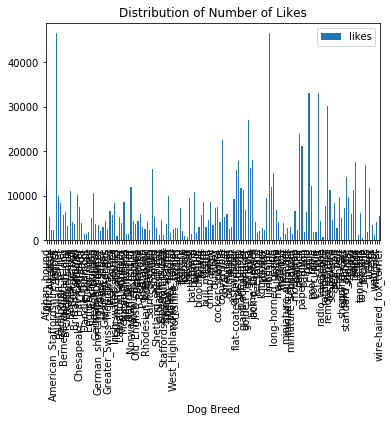

In [31]:
#summarize with a graph showing the breeds with the greatest number of likes: 
import matplotlib.pyplot as plt
%matplotlib inline
df_breed_likes.plot.bar(x = 'predicted_breed', y = 'likes')
labels = df_breed_likes.predicted_breed

plt.title('Distribution of Number of Likes')
plt.xlabel('Dog Breed')


Looking at the above graph it is not clear (due to the number of breeds) which are most liked. Obviously, there are too many breeds shown on this graph. There are 143 total breeds in this data set. To get a better understanding of which breeds are most popular on the twitter site "We rate dogs", it makes more sense to take the top 40, for example, and look at the which breeds those are. 
Also interesting is that the number of likes falls mostly below 10,000 (75%). There are less than 25% of the breeds in this subset of data that are greater than that, with the max at 46,549. It'll be interesting to see which breeds got the highest likes. 
Below please find the subset of the 20 highest liked breeds, as well as the summary of the number of likes for the most popular breeds. 

In [32]:
#find the greatest 20 likes in the dataframe df_breed_likes
df_breed_likes_largest = df_breed_likes.nlargest(40, 'likes')

In [33]:
df_breed_likes_largest.describe()

,likes
count,40.000000
mean,16577.685617
std,9590.481587
min,8463.250000
25%,10402.471719
50%,11975.642857
75%,17899.850000
max,46549.000000


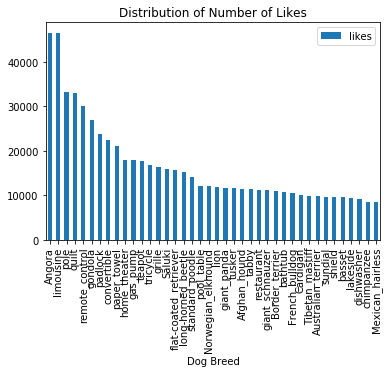

In [34]:
df_breed_likes_largest.plot.bar(x = 'predicted_breed')
x_labels = df_breed_likes.predicted_breed
labels = x_labels

plt.title('Distribution of Number of Likes')
plt.xlabel('Dog Breed')

It looks like, from this plot, there were actually no dog breeds that had over 40,000 likes. Angora is a cat breed. Also, the machine learning model that was used to pull some of these dog breeds based on a picture didn't get all the top liked tweets correct. Starting with the first actual dog breed, it looks like the most liked breed is the Saluki, followed by breeds like flat-coated retriever, standard poodle and the norweigen elkhound. Of course, there may actually be a few breeds that received greater than 20,000 likes, and the machine learning algorithm just didn't identify the breed correctly. 
Despite not knowing exactly which breeds received the most likes, we can say that the average number of likes for the breeds in this dataset is 7,297 and 75% of the breeds (correctly or incorrectly identified) received 17,900 likes or less. 
Optimally, at this stage, a reassessment would be performed on the dog breed dataset and the data would be cleaned to remove all incorrect dog breeds. This was not one of the 8 quality attributes chosen to fix, but had it been, we would have a clearer understanding of which breeds are most popular. 

### Insight #2: Which classification resulted in the highest rating? 

The next area I'll explore is determining which classifications resulted in the highest ratings given by the dog owner. The classifications that I'm referring to are doggo (big pupper, usually older), floofer (dogs with excess fur), pupper (small dogs, usually younger), and puppo (transitional phase between pupper and doggo). This was a limited data set to begin with. That is, although there are 1994 tweet id's, most of the tweet id's did not provide this classification.  

The "Final float ratings" is a converted rating given to the dog by the person tweeting. These numbers started as fraction and were extracted from the tweet text. For example, a rating of value of 1.2 is actually a rating of 12/10. That is, their dog is of course so great that the numerator exceeds the denominator. 

In [35]:
#Group by category to determine the average rating per classification
classification_ratings = df.groupby
classification_ratings = df.groupby(['classification'])['final_float_ratings'].mean()

In [36]:
classification_ratings.head()

classification
doggo           1.178378
floofer         1.200000
not provided    1.175758
pupper          1.062202
puppo           1.200000
Name: final_float_ratings, dtype: float64

It looks like the order of ranking for scores is: 

1) Floofer and puppo tied at 1.2

2) Doggo at 1.178

3) Pupper at 1.066

Whether or not these ranking are significant, they do seem to make some sense. That is, puppies ("pupper") are a lot of work, requiring extra attention and training. Floofers are fluffy, one of the main draws of having a pet, and puppo is the stage beyond the high attention needs of a pupper but still plenty of energy to play. 
And of course, it makes sense that people would rank their Doggo higher than a new puppy, especially if the owner has had the dog for a long time. 


### Insight #3: Is there a time of day that people tweet the most about their dogs? 

Just out of curiosity, it would be interesting to find out when people are most active on twitter when tweeting about their dogs. Before the analysis occurs, I'm going to guess afternoon or evening, since that's when most people are leisurely spending time with their dogs. 
What this will entail is adding a column to the dataframe (morning, afternoon, evening, or night). The way I will classify the times are as follows: 

6am - 12am : Morning (hour 6 - 12)

12pm - 5 pm: Afternoon (hour 12 - 17)

5pm - 9 pm: Evening (hour 17-21)

9 pm - 6 am: Night (hour 21-24, 0-6)

In [37]:
#Convert the datetime into a datetime object: 
df['timestamp'] = pd.to_datetime(df.timestamp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 9 columns):
tweet_id               1994 non-null int64
likes                  1994 non-null float64
retweet_count          1994 non-null float64
predicted_breed        1994 non-null object
timestamp              1994 non-null datetime64[ns]
text                   1994 non-null object
new_names              1994 non-null object
final_float_ratings    1994 non-null float64
classification         1994 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 140.3+ KB


In [38]:
df.head()

,tweet_id,likes,retweet_count,predicted_breed,timestamp,text,new_names,final_float_ratings,classification
0,890006608113172480,30808.0,7447.0,Samoyed,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,koda,1.3,not provided
1,872620804844003328,20998.0,3804.0,cocker_spaniel,2017-06-08 01:06:27,This is Monkey. She's supporting owners everyw...,monkey,1.3,not provided
2,872486979161796608,41017.0,9220.0,Pembroke,2017-06-07 16:14:40,We. Only. Rate. Dogs. Do not send in other thi...,Invalid Name,1.2,not provided
3,870804317367881728,34089.0,6417.0,home_theater,2017-06-03 00:48:22,Real funny guys. Sending in a pic without a do...,Invalid Name,1.1,not provided
4,870374049280663552,83813.0,27060.0,golden_retriever,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,zoey,1.3,not provided


In [39]:
#Extract the hour from each timestamp for further classification into bins: 
for index, row in df.iterrows():
    time = row[4]
    df.loc[index, "extracted_hour"] = time.hour
    

In [40]:
df.head()

,tweet_id,likes,retweet_count,predicted_breed,timestamp,text,new_names,final_float_ratings,classification,extracted_hour
0,890006608113172480,30808.0,7447.0,Samoyed,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,koda,1.3,not provided,0.0
1,872620804844003328,20998.0,3804.0,cocker_spaniel,2017-06-08 01:06:27,This is Monkey. She's supporting owners everyw...,monkey,1.3,not provided,1.0
2,872486979161796608,41017.0,9220.0,Pembroke,2017-06-07 16:14:40,We. Only. Rate. Dogs. Do not send in other thi...,Invalid Name,1.2,not provided,16.0
3,870804317367881728,34089.0,6417.0,home_theater,2017-06-03 00:48:22,Real funny guys. Sending in a pic without a do...,Invalid Name,1.1,not provided,0.0
4,870374049280663552,83813.0,27060.0,golden_retriever,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,zoey,1.3,not provided,20.0


In [41]:
#Divide up the hour according to bins outlined in the description above: 

# Bin edges that will be used to "cut" the data into groups
bin_edges = [-0.1, 6.0, 12.0, 17.0, 21.0, 24.1] 

#Step 3:
# Labels for the five time of day groups
bin_names = [ 'early morning', 'morning' , 'afternoon','evening', 'night' ] # Name each acidity level category

#Step 4:
# Creates part of day column
df['part_of_day'] = pd.cut(df['extracted_hour'], bin_edges, labels=bin_names)


#Step 5:
# Find the count for the number of tweets for each time of day category.
df.groupby('part_of_day').count()




,tweet_id,likes,retweet_count,predicted_breed,timestamp,text,new_names,final_float_ratings,classification,extracted_hour
part_of_day,,,,,,,,,,
early morning,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036
morning,0,0,0,0,0,0,0,0,0,0
afternoon,455,455,455,455,455,455,455,455,455,455
evening,327,327,327,327,327,327,327,327,327,327
night,176,176,176,176,176,176,176,176,176,176


I wasn't surprised by this information. The time shown above is UTC time, which is 4 hours ahead of EST. So the bins are actually as follows: 
For the purpose of this analysis, we'll assume EST, although tweets are most likely from other parts of the country and world on different time zones. Most of the US is either on EST or central (which is only 1 hour from EST). 

Early morning (0 -6 am UTC) : (4am - 10 am EST)

Morning (6 - 12 am UTC): (10am - 4 pm EST)

Afternoon (12 pm - 5 pm UTC): (4 pm - 9 pm EST)

Evening (5 pm - 9 pm UTC): (9 pm - 1 am EST) 

Night (9 pm - 12 midnight) : (1 am - 4 am EST)

Most tweets occurred between the hours of 4 am and 10 am EST, which makes sense, since dogs need to be walked in the morning, and that's when most people are out with their dogs. What I found interesting is that no tweets in this dataset are between 10 am and 4 pm. Although most people are working between those hours, I found it surprising that 0 tweets occurred during that time (in this dataset). 

Also not surprising is that the next most popular time was between the hours of 4 and 9 pm (dogs also need their second walk of the day), followed by 9 p -1 am , and then 1 am until 4 am. 
To be sure my classification was correct, I double checked the values of the values of the extracted hour in the code block below. 

In [42]:
df['extracted_hour'].unique()

array([  0.,   1.,  16.,  20.,   4.,  19.,  23.,  17.,   3.,  15.,  18.,
        22.,  21.,   2.,   6.,  14.,   5.,  13.])

#### Visual: Word cloud of texts and descriptions about the dogs

Each tweet id in this dataframe has texts associated with the tweet. These words are typically words used to describe their dogs, as well as might they might be doing in the picture. 

A word cloud is a great way to represent a summary of the tweets about how people feel about their dogs, and why they tweet about them (or at least the people in this dataset). 



In [43]:
#Download packages required for wordcloud: 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

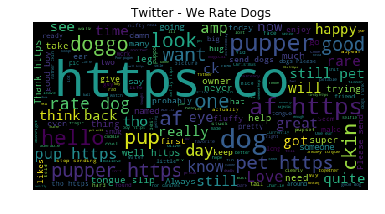

In [47]:
#Generate the word cloud image
wordcloud = WordCloud().generate(''.join(df['text']))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Twitter - We Rate Dogs")
plt.show()




#### Final Conclusions/Statements: 

Not surprisingly, people love their dogs, and they love to tweet about them. Through this analysis exercise, I found that people tweet about their dogs the most when they are with them. The words in the word cloud above show the most common words people associate with their dogs. The most common word, https, was left in there. I thought it made sense to leave this word in, since this project is all about what people are posting about their dogs on twitter. Other words that pop out are happy, good, pup, pupper, tongue. etc. 
Overall, the message to be taken from this exercise is that dogs are people's best friends, and people love to share information about them with others. 